<a href="https://colab.research.google.com/github/Zarak00/Projects/blob/main/Airline_Data/Airline_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


ect, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> FILES (https://github.com/simsekergun/DATA601/tree/main/Project2/datasets) </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Project2/DATA601_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Answer the following questions or complete the tasks <br>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
import datetime
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
import math

In [ ]:
flights2DCMDVA=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights2DCMDVA.xlsx',parse_dates={"date":["year","month","day"]})
flights2DCMDVA.head(1)

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013-01-01,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0


In [ ]:
airlines=pd.read_csv('/content/gdrive/Shareddrives/601-Project2/airlines.csv')
airlines.head(1)

,carrier,name
0,9E,Endeavor Air Inc.


In [ ]:
airports=pd.read_csv('/content/gdrive/Shareddrives/601-Project2/airports.csv')
airports.head(1)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York


In [ ]:
planes=pd.read_csv('/content/gdrive/Shareddrives/601-Project2/planes.csv')
planes.head(1)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


In [ ]:
df1 = pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights2DCMDVA.xlsx')
df2 = pd.read_csv('/content/gdrive/Shareddrives/601-Project2/planes.csv')
mergedf = pd.merge(df1, df2, on = 'tailnum')

In [ ]:
weatherNYhourly=pd.read_csv('/content/gdrive/Shareddrives/601-Project2/weatherNYhourly.csv')
weatherNYhourly.head(1)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z


In [ ]:
weatherMDdaily=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/weatherMDdaily.xlsx')
weatherMDdaily.rename(columns={'Date':'date'})
weatherMDdaily.head(1)

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,44,34,0,0,0


In [ ]:
weatherNYdaily=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/weatherNYdaily.xlsx')
weatherNYdaily.head(1)

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,41,27,0,0,0


In [ ]:
federalholidays2013=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/federal-holidays-2013.xlsx', skiprows=1)
federalholidays2013.head()

,Date,Federal holiday,Day of the week
0,"January 1, 2013",New Year's Day,Tuesday
1,"January 21, 2013",Martin Luther King Day,Monday
2,"February 18, 2013",Presidents' Day,Monday
3,"May 27, 2013",Memorial Day,Monday
4,"July 4, 2013",Independence Day,Thursday


In [ ]:
federalholidays2013.dropna(inplace=True)

In [ ]:
federalholidays2013['date'] = pd.to_datetime(federalholidays2013['Date'])
federalholidays2013.drop('Date',axis=1,inplace=True)
federalholidays2013.head()

,Federal holiday,Day of the week,date
0,New Year's Day,Tuesday,2013-01-01
1,Martin Luther King Day,Monday,2013-01-21
2,Presidents' Day,Monday,2013-02-18
3,Memorial Day,Monday,2013-05-27
4,Independence Day,Thursday,2013-07-04


In [ ]:
flights_test_data=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights_test_data.xlsx',parse_dates={"date":["year","month","day"]})
flights_test_data.head(1)

,date,carrier,origin,dest,distance
0,2013-01-06,MQ,JFK,DCA,213


#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

In [ ]:
flights_planes = pd.merge(flights2DCMDVA, planes, how='left',on='tailnum')
flights_planes.head(1)

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,...,hour,minute,year,type,manufacturer,model,engines,seats,speed,engine
0,2013-01-01,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,...,6.0,29.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan


In [ ]:
#1.a
df1=flights_planes.groupby('dest')['seats'].sum().sort_values(ascending=False).reset_index(name='Seats')
df1

,dest,Seats
0,DCA,906225.0
1,IAD,296004.0
2,BWI,96135.0


In [ ]:
#1.b
df2 = flights2DCMDVA.groupby(['date']).size().nlargest(5).reset_index(name='Number of Flights')
print("DAY OF YEAR:", df2['date'][0].dayofyear,df2['date'][1].dayofyear)
print(df2)
#So,here 17th January 2013,11th January 2013, has the highest number of flights with count of 61.

DAY OF YEAR: 11 17
        date  Number of Flights
0 2013-01-11                 61
1 2013-01-17                 61
2 2013-01-07                 60
3 2013-01-08                 60
4 2013-01-09                 60


In [ ]:
#1.c
df3 = flights_planes.groupby(['date'])['seats'].sum().sort_values(ascending=False).reset_index(name='Seats Available')
print("DAY OF YEAR:", df3['date'][0].dayofyear)
print(df3.head())
#So,here 28th February 2013 has the highest number of seats with the count of 5379.

DAY OF YEAR: 59
        date  Seats Available
0 2013-02-28           5379.0
1 2013-01-11           5318.0
2 2013-01-07           5272.0
3 2013-01-24           5268.0
4 2013-02-07           5267.0


#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>



In [ ]:
#2.a
cancel = flights_planes['dep_time'].isnull() & flights_planes['dep_delay'].isnull() & flights_planes['arr_time'].isnull() & flights_planes['arr_delay'].isnull() & flights_planes['air_time'].isnull() & flights_planes['hour'].isnull() & flights_planes['minute'].isnull()
df_cancellations=flights_planes[cancel]
df_cancellations_count=df_cancellations['date'].value_counts().rename_axis('Date').reset_index(name='No.of.Cancellations')
df_cancellations_count
#On 6th March 2013,most of the of flights got cancelled with count of 46.

,Date,No.of.Cancellations
0,2013-03-06,46
1,2013-02-08,33
2,2013-09-12,25
3,2013-03-08,23
4,2013-05-23,21
...,...,...
219,2013-08-06,1
220,2013-08-02,1
221,2013-03-03,1
222,2013-03-11,1


In [ ]:
#2.b
df_weathermd = weatherMDdaily
df_weatherny= weatherNYdaily

mergedf['date'] = mergedf.apply(lambda x: str(x['year_x'])+'-'+str(x['month'])+'-'+str(x['day']), axis=1)
mergedf['date'] = pd.to_datetime(mergedf['date'])
mergedf['cancellation'] = mergedf['dep_time'].apply(lambda x: 1 if math.isnan(x) else 0) 
date_cancel = mergedf.groupby('date')['cancellation'].sum().reset_index().sort_values (by ='cancellation', ascending=False)  
mergedf_cancel = pd.merge(date_cancel, df_weathermd, left_on='date', right_on='Date')

mergedf_cancel[ 'Precipitation'].replace('T',0,inplace=True) 
mergedf_cancel[ 'Snowfall' ].replace('T',0, inplace=True) 
mergedf_cancel['Snow Depth' ].replace('T',0, inplace=True)

In [ ]:
corr, temp = pearsonr (mergedf_cancel[ 'Precipitation'], mergedf_cancel['cancellation']) 
print("Pearson Corr b/w Precipitation & Cancellation:", round (corr, 2))

corr, temp = pearsonr (mergedf_cancel[ 'Snowfall'], mergedf_cancel['cancellation']) 
print("Pearson Corr b/w Snowfall & Cancellation:", round (corr, 2))

corr, temp = pearsonr (mergedf_cancel[ 'Snow Depth'], mergedf_cancel['cancellation']) 
print("Pearson Corr b/w Snow Depth & Cancellation:", round (corr, 2))

Pearson Corr b/w Precipitation & Cancellation: 0.25
Pearson Corr b/w Snowfall & Cancellation: 0.12
Pearson Corr b/w Snow Depth & Cancellation: 0.03


In [ ]:
print('Since the Pearson Correlation coefficient is very low between Weather and Cancellation, we can say that the Weather and Cancellation arent correlated.')

Since the Pearson Correlation coefficient is very low between Weather and Cancellation, we can say that the Weather and Cancellation arent correlated.


In [ ]:
#2.c
holidaydf=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/federal-holidays-2013.xlsx')
holidaydf.rename(columns={'Federal holidays 2013':'Date','Unnamed: 1':'Holiday','https://www.calendarpedia.com/':'Day'},inplace=True)
holidaydf = holidaydf[1:-1]
holidaydf['Date'] = pd.to_datetime(holidaydf['Date'])

holidaydf_cancel = pd.merge(holidaydf, mergedf_cancel, how='right')
holidaydf_cancel.fillna(0,inplace=True)
holidaydf_cancel.loc[holidaydf_cancel.Holiday!=0,'Holiday']=1
holidaydf_cancel.head()

,Date,Holiday,Day,date,cancellation,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,0,0,2013-03-06,25,40,33,0.75,0.0,0
1,2013-02-08,0,0,2013-02-08,18,42,33,0.24,0.0,0
2,2013-03-08,0,0,2013-03-08,13,49,33,0.00,0.0,0
3,2013-05-23,0,0,2013-05-23,11,80,65,0.99,0.0,0
4,2013-09-12,0,0,2013-09-12,10,89,70,0.65,0.0,0


In [ ]:
corr, temp = pearsonr (holidaydf_cancel[ 'Holiday'], holidaydf_cancel['cancellation'])

print('Pearson Corr b/w Holiday & Cancellation:', round(corr,2))

Pearson Corr b/w Holiday & Cancellation: -0.06


In [ ]:
print("Since the Pearson Correlation coefficient is very low between Holiday and Cancellation")

Since the Pearson Correlation coefficient is very low between Holiday and Cancellation


In [ ]:
#2.d
print(f"Total number of seats for the cancelled flights: {df_cancellations['seats'].sum()}")
print(f" Total Economic Loss is: {df_cancellations['seats'].sum()*50}")

Total number of seats for the cancelled flights: 24032.0
 Total Economic Loss is: 1201600.0


In [ ]:
#2.e
df_planned=flights_planes.drop(flights_planes[cancel].index)
df_planned.head(1)

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,...,hour,minute,year,type,manufacturer,model,engines,seats,speed,engine
0,2013-01-01,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,...,6.0,29.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan


In [ ]:
d1 = df_planned['carrier'].value_counts().to_dict()
d2 = df_cancellations['carrier'].value_counts().to_dict()


In [ ]:
for i in d1:
    if i in d2:
        print(f"Ratio of cancelled/planned flights for {i} is {d2[i]/d1[i]}")
    else:
        print(f"Ratio of cancelled/planned flights for {i} is {0/d1[i]}")

Ratio of cancelled/planned flights for EV is 0.06427451663473263
Ratio of cancelled/planned flights for US is 0.051104664137469315
Ratio of cancelled/planned flights for 9E is 0.058823529411764705
Ratio of cancelled/planned flights for MQ is 0.06195426195426196
Ratio of cancelled/planned flights for B6 is 0.01199400299850075
Ratio of cancelled/planned flights for YV is 0.11469534050179211
Ratio of cancelled/planned flights for WN is 0.04
Ratio of cancelled/planned flights for UA is 0.0
Ratio of cancelled/planned flights for DL is 0.0
Ratio of cancelled/planned flights for OO is 0.0


In [ ]:
l1=df_planned['carrier'].value_counts().to_list()
l1

[5741, 4481, 2448, 2405, 667, 279, 200, 3, 2, 1]

In [ ]:
l2=df_cancellations['carrier'].value_counts().to_list()
l2
#So,here the most reliable airline company is UA,DL,OO as they have 0 cancellations and the least reliable airline company is YV as it has the cancellation rate of 11.4%

[369, 229, 149, 144, 32, 8, 8]


For the next group of questions/tasks, do not include the cancelled flights.
#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>


#### a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.

In [ ]:
#3.a
df3a = flights_planes.groupby(['date'])['arr_delay'].mean().reset_index(name='average_delay')
df3a.index=df3a.index+1
df3a.head()

,date,average_delay
1,2013-01-01,34.075000
2,2013-01-02,23.702128
3,2013-01-03,8.040816
4,2013-01-04,5.326531
5,2013-01-05,-8.538462


In [ ]:
q3b=pd.merge(df3a,federalholidays2013,how='left',on='date')
q3b.index=q3b.index+1
q3b.head()

,date,average_delay,Federal holiday,Day of the week
1,2013-01-01,34.075000,New Year's Day,Tuesday
2,2013-01-02,23.702128,NaN,NaN
3,2013-01-03,8.040816,NaN,NaN
4,2013-01-04,5.326531,NaN,NaN
5,2013-01-05,-8.538462,NaN,NaN


In [ ]:
q3b.dropna(inplace=True)
q3b.head()

,date,average_delay,Federal holiday,Day of the week
1,2013-01-01,34.075000,New Year's Day,Tuesday
21,2013-01-21,9.090909,Martin Luther King Day,Monday
49,2013-02-18,-5.745763,Presidents' Day,Monday
147,2013-05-27,-2.232558,Memorial Day,Monday
185,2013-07-04,-14.033333,Independence Day,Thursday


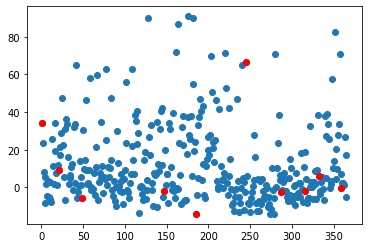

In [ ]:
plt.scatter(y=df3a['average_delay'],x=df3a.index)
plt.scatter(x=q3b.index,y=q3b['average_delay'], color="red")

**b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)**

In [ ]:
weatherMDdaily["Date"] = pd.to_datetime(weatherMDdaily["Date"])
df_avg_delay=df_planned.groupby('date')['arr_delay'].mean().reset_index()
df_avg_delay['date']= pd.to_datetime(df_avg_delay['date'])
correlations_weather=pd.merge(df_avg_delay,weatherMDdaily,left_on='date',right_on='Date',how='left')
correlations_weather['Precipitation']=correlations_weather['Precipitation'].replace('T',0)
correlations_weather['Snowfall']=correlations_weather['Snowfall'].replace('T',0)
correlations_weather['Snow Depth']=correlations_weather['Snow Depth'].replace('T',0)
correlations_weather.corr()

,arr_delay,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
arr_delay,1.000000,0.051003,0.172477,0.376755,0.137704,0.101120
Max Temp,0.051003,1.000000,0.933514,-0.002687,-0.207904,-0.261180
Min Temp,0.172477,0.933514,1.000000,0.094914,-0.147471,-0.221124
Precipitation,0.376755,-0.002687,0.094914,1.000000,0.106251,0.037556
Snowfall,0.137704,-0.207904,-0.147471,0.106251,1.000000,0.646871
Snow Depth,0.101120,-0.261180,-0.221124,0.037556,0.646871,1.000000


In [ ]:
correlations_weather

,date,arr_delay,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,34.075000,2013-01-01,44,34,0.00,0.0,0
1,2013-01-02,23.702128,2013-01-02,37,26,0.00,0.0,0
2,2013-01-03,8.040816,2013-01-03,38,22,0.00,0.0,0
3,2013-01-04,5.326531,2013-01-04,42,23,0.00,0.0,0
4,2013-01-05,-8.538462,2013-01-05,43,31,0.00,0.0,0
...,...,...,...,...,...,...,...,...
360,2013-12-27,2.090909,2013-12-27,49,22,0.00,0.0,0
361,2013-12-28,1.272727,2013-12-28,58,28,0.00,0.0,0
362,2013-12-29,26.740741,2013-12-29,47,39,1.09,0.0,0
363,2013-12-30,-5.275862,2013-12-30,47,32,0.00,0.0,0


In [ ]:
convert_dict = {'Snowfall': float,
                'Snow Depth': float }
correlations_weather = correlations_weather.astype(convert_dict)

In [ ]:
from scipy.stats import pearsonr
corr, _= pearsonr(correlations_weather['Max Temp'], correlations_weather['arr_delay'])
print('Pearsons correlation Max Temp: %.3f' % _)

corr, _ = pearsonr(correlations_weather['Min Temp'], correlations_weather['arr_delay'])
print('Pearsons correlation Min Temp: %.3f' % _)


corr, _ = pearsonr(correlations_weather['Snowfall'],correlations_weather['arr_delay'])
print('Pearsons correlation Snowfall: %.3f' % _)

corr, _ = pearsonr(correlations_weather['Snow Depth'], correlations_weather['arr_delay'])
print('Pearsons correlation Snow Depth: %.3f' % _)

Pearsons correlation Max Temp: 0.331
Pearsons correlation Min Temp: 0.001
Pearsons correlation Snowfall: 0.008
Pearsons correlation Snow Depth: 0.054


**c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?**

In [ ]:
mergedftemp = mergedf
pltdata = mergedftemp.groupby('date')['arr_delay'].mean().reset_index()
pltdata['day'] = pltdata['date'].apply(lambda x:x.timetuple().tm_yday)
pltdata.rename(columns={'date':'Date'},inplace=True)

pltdata_final = pd.merge(pltdata, holidaydf, on='Date', how='left')
pltdata_final.fillna(0,inplace=True)
pltdata_final.loc[pltdata_final.Holiday!=0,'Holiday']=1
pltdata_final.drop(columns=['Day','Date'],inplace=True)

In [ ]:
hol_delay_corr=pltdata_final.groupby('Holiday')['arr_delay'].mean().reset_index()
hol_delay_corr.corr()

,Holiday,arr_delay
Holiday,1.0,-1.0
arr_delay,-1.0,1.0


In [ ]:
print('Hence, Arrival Delay and Federal Holiday are strongly negatively correlated.')

Hence, Arrival Delay and Federal Holiday are strongly negatively correlated.


**d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)**

In [ ]:
#3d
df3d = flights_planes.groupby(['dest'])['arr_delay'].mean().sort_values(ascending=False).reset_index(name='average_delay')
df3d
#Most reliable airport is DCA and least reliable airport is IAD

,dest,average_delay
0,IAD,13.866071
1,BWI,10.745552
2,DCA,9.069106


**e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)**

In [ ]:
#3e
df3e = flights_planes.groupby(['carrier'])['arr_delay'].mean().sort_values(ascending=False).reset_index(name='average_delay')
df3e
#Most reliable airport is DL and least reliable airport is YV

,carrier,average_delay
0,YV,18.917266
1,EV,17.359776
2,B6,12.805097
3,MQ,10.995401
4,US,5.829000
5,WN,4.915000
6,9E,3.612890
7,OO,3.000000
8,UA,-7.666667
9,DL,-8.000000


**f. What day of the week we had the highest average delay?**

In [ ]:
#3f
flights_planes['Day']=flights_planes['date'].dt.day_name()
df3f = flights_planes.groupby(['Day'])['arr_delay'].mean().sort_values(ascending=False).reset_index(name='average_delay')
df3f
#We had the highest delay on Monday

,Day,average_delay
0,Monday,15.433646
1,Friday,13.068331
2,Thursday,12.458195
3,Wednesday,11.315916
4,Tuesday,10.414121
5,Sunday,6.571429
6,Saturday,3.956917


**g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?**

In [ ]:
import numpy as np
df_planned['dep_time'] = df_planned['dep_time'].values.astype(np.int64)

In [ ]:
time_groups=pd.cut(df_planned['dep_time'],ordered=False,bins=[600, 1000, 1100,1400,1500,1700,1800,2200],labels=['morning','','noon','','afternoon','','evening'])

In [ ]:
df_day_timings=df_planned.groupby(time_groups)['arr_delay'].mean().reset_index()
df_day_timings.iloc[1:]
#Flights that took off in afternoon has the highest average delay.

,dep_time,arr_delay
1,afternoon,18.990246
2,evening,16.761868
3,morning,-1.723660
4,noon,10.229515


**h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.**

In [ ]:
#3.h
df_manufacturer=flights2DCMDVA.merge(planes[['tailnum','manufacturer']],on='tailnum', how='left')
print("BOEING",(df_manufacturer['manufacturer']=='BOEING').sum())
print("EMBRAER",(df_manufacturer['manufacturer']=='EMBRAER').sum())
print("AIRBUS",(df_manufacturer['manufacturer']=='AIRBUS').sum())
#BOEING has manufactured 208,EMBRAER manufactured 4606 and AIRBUS manufactured 4 airplanes

BOEING 208
EMBRAER 4606
AIRBUS 4




#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
le= LabelEncoder()
df_planned=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights2DCMDVA.xlsx')
X=df_planned[['year','month','day','carrier','origin','dest','distance']]
y=df_planned[['arr_delay']]

flights_test_data=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights_test_data.xlsx')

In [ ]:
categorical_col=['carrier','origin','dest']
X[categorical_col] = X[categorical_col].apply(le.fit_transform)
y=y.fillna(y.mean())

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.004147006671918807


In [ ]:
flights_test_data[categorical_col]=flights_test_data[categorical_col].apply(le.fit_transform)

In [ ]:
y_pred = regressor.predict(flights_test_data)

In [ ]:
flights_test_data['arr_delay']=y_pred
flights_test_data.head()

,year,month,day,carrier,origin,dest,distance,arr_delay
0,2013,1,6,2,1,1,213,9.683063
1,2013,1,25,1,2,2,229,10.718957
2,2013,2,11,2,1,1,213,9.527239
3,2013,4,14,3,2,1,214,5.735312
4,2013,4,29,1,2,2,229,9.677370


In [ ]:
from sklearn import metrics
print(f"Root Mean Squared Error:{(np.sqrt(metrics.mean_squared_error(y_test.sample(20), y_pred)))/100}")
#RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.



Root Mean Squared Error:0.22702714091482154


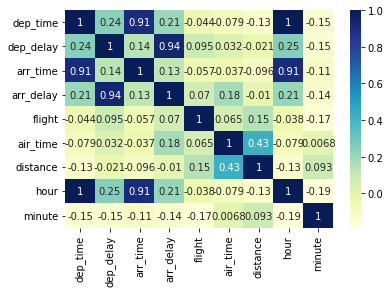

In [ ]:
sns.heatmap(flights2DCMDVA.corr(), cmap="YlGnBu", annot = True)
plt.show()


#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [ ]:
df_cancellations.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
136,2013,1,13,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN
137,2013,1,13,NaN,NaN,NaN,NaN,MQ,N655MQ,3944,JFK,BWI,NaN,184,NaN,NaN
167,2013,1,16,NaN,NaN,NaN,NaN,9E,NaN,3635,JFK,BWI,NaN,184,NaN,NaN
204,2013,1,20,NaN,NaN,NaN,NaN,EV,N16178,4316,EWR,BWI,NaN,169,NaN,NaN
213,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN


In [ ]:
from sklearn.linear_model import LogisticRegression
df_cancellations=df_planned[cancel]
df_flight_test_guess=flights_test_data[['year', 'month', 'day', 'carrier', 'origin', 'dest', 'distance']]
X_CAN=df_cancellations[['year','month','day','carrier','origin','dest','distance']]
y_CAN=df_cancellations[['flight']]


In [ ]:
categorical_col=['carrier','origin','dest']
X_CAN[categorical_col] = X_CAN[categorical_col].apply(le.fit_transform)
y_CAN[['flight']] = y_CAN[['flight']].apply(le.fit_transform)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_CAN, y_CAN, test_size=0.2, random_state=0)

In [ ]:
logregressor = LogisticRegression()
logregressor.fit(X_train_1, y_train_1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
df_flight_test_guess[categorical_col]=df_flight_test_guess[categorical_col].apply(le.fit_transform)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
y_pred = logregressor.predict(df_flight_test_guess)

In [ ]:
df_flight_test_guess['flight']=y_pred

In [ ]:
df_flight_test_guess.head(3)

,year,month,day,carrier,origin,dest,distance,flight
0,2013,1,6,2,1,1,213,38
1,2013,1,25,1,2,2,229,81
2,2013,2,11,2,1,1,213,38


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_1.sample(20).to_numpy(),y_pred)
score

0.05

In [ ]:
print(f"Accuracy is {int(score*100)}%")
#Accuracy of this prediction is very low.

Accuracy is 5%


In [ ]:
#Extra Code

#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import OneHotEncoder

#flights2DCMDVA=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights2DCMDVA.xlsx')
#flights2DCMDVA = flights2DCMDVA.dropna()
#x_train=flights2DCMDVA[['year','month','day', 'carrier', 'origin', 'dest', 'distance']]
#_train=flights2DCMDVA['arr_delay']
#x_test=pd.read_excel('/content/gdrive/Shareddrives/601-Project2/flights_test_data.xlsx')

In [ ]:
#ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#def process_data_transform(x):
 # x[['year','month','day', 'carrier', 'origin', 'dest']]=x[['year','month','day', 'carrier', 'origin', 'dest']].astype('category')
  #x = ohe.fit_transform(x[['carrier', 'origin', 'dest']])
  #Converting back to a dataframe 
  #x = pd.DataFrame(x, columns=ohe.get_feature_names())
  #x_train=x.copy()
  #return x_train

In [ ]:
#x_train=process_data_transform(x_train)
#x_test=ohe.transform(x_test[['carrier', 'origin', 'dest']])
#x_test = pd.DataFrame(x_test, columns=ohe.get_feature_names())

#lin_reg = LinearRegression()
#lin_reg.fit(x_train, y_train)


In [ ]:
#y_pred = lin_reg.predict(x_test)
#pred_arr_delay = pd.DataFrame(y_pred, columns=['pred_arr_delay'])
#pred_arr_delay

In [ ]:
merged_df = pd.merge(flights2DCMDVA, federalholidays2013, left_on='date', right_on='date')

In [ ]:
merged_df

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Federal holiday,Day of the week
0,2013-01-01,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,New Year's Day,Tuesday
1,2013-01-01,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,New Year's Day,Tuesday
2,2013-01-01,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,New Year's Day,Tuesday
3,2013-01-01,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,New Year's Day,Tuesday
4,2013-01-01,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,New Year's Day,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2013-12-25,1519.0,25.0,1643.0,9.0,9E,N8970D,2946,JFK,IAD,47.0,228,15.0,19.0,Christmas Day,Wednesday
421,2013-12-25,1747.0,28.0,1903.0,27.0,EV,N27962,3847,EWR,IAD,47.0,212,17.0,47.0,Christmas Day,Wednesday
422,2013-12-25,1809.0,29.0,1922.0,22.0,B6,N258JB,1407,JFK,IAD,49.0,228,18.0,9.0,Christmas Day,Wednesday
423,2013-12-25,1922.0,-13.0,2049.0,-6.0,EV,N829AS,5714,JFK,IAD,45.0,228,19.0,22.0,Christmas Day,Wednesday


In [ ]:
merged_df.date = pd.to_numeric(merged_df.date)

In [ ]:
corr = merged_df['arr_delay'].corr(merged_df['date'])

In [ ]:
print(corr)

-0.03314474550500153
